In [1]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np
import pandas as pd

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Leer datos separados por una coma
# data = np.loadtxt(os.path.join('data', 'ex1data1.txt'), delimiter=',')
data = pd.read_csv('/content/drive/MyDrive/01 regresiones/archive/student_scores.csv')


 # m = numero de ejemplos de entrenamiento

In [ ]:
# Asignar X e y a partir de las columnas restantes del DataFrame
X = data.iloc[:, 0].values  # Ahora esta es la primera columna después de eliminar
y = data.iloc[:, 1].values  # Y esta es la segunda columna

m = y.size  # m = numero de ejemplos de entrenamiento

In [ ]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
print("valores de X")
print(X)#valores en x
print("valores de y")
print(y)#valores en y
print("tamanio")
print(X.size)#filas o ejemplos

valores de X
[2.5 5.1 3.2 8.5 3.5 1.5 9.2 5.5 8.3 2.7 7.7 5.9 4.5 3.3 1.1 8.9 2.5 1.9
 6.1 7.4 2.7 4.8 3.8 6.9 7.8]
valores de y
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]
tamanio
25


In [ ]:
def plotData(x, y):
    #Grafica los puntos x e y en una figura nueva.

    fig = pyplot.figure()  # abre una nueva figura

    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Horas')#valores en y
    pyplot.xlabel('Puntuacion')#valores en x


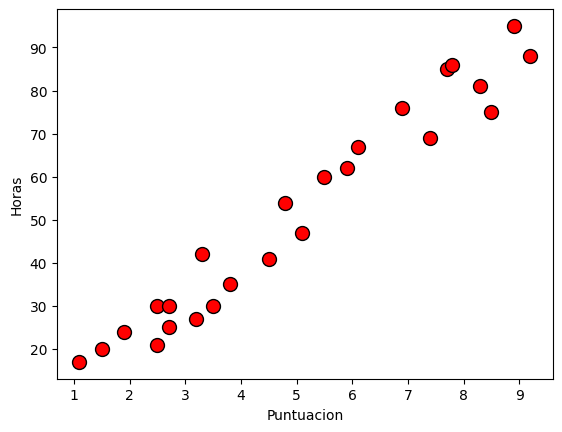

In [ ]:
plotData(X, y)#dibujamos la grafica

hasta aqui solo se valido los datos y se asigno los datos a x e y

In [ ]:
# Agrega una columna de unos a X. La funcion stack de numpy une matrices a lo largo de un eje dado.
# El primer eje (eje = 0) se refiere a filas (ejemplos de entrenamiento)
# y el segundo eje (eje = 1) se refiere a columnas (características).

X = np.stack([np.ones(m), X], axis=1)

In [ ]:
print(X)

[[1.  2.5]
 [1.  5.1]
 [1.  3.2]
 [1.  8.5]
 [1.  3.5]
 [1.  1.5]
 [1.  9.2]
 [1.  5.5]
 [1.  8.3]
 [1.  2.7]
 [1.  7.7]
 [1.  5.9]
 [1.  4.5]
 [1.  3.3]
 [1.  1.1]
 [1.  8.9]
 [1.  2.5]
 [1.  1.9]
 [1.  6.1]
 [1.  7.4]
 [1.  2.7]
 [1.  4.8]
 [1.  3.8]
 [1.  6.9]
 [1.  7.8]]


In [ ]:
def computeCost(X, y, theta):
    # inicializa algunos valores importantes
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    # h = np.dot(X, theta)
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

In [ ]:
def gradientDescent(X, y, theta, alpha, num_iters):
        # Inicializa algunos valores importantes
    m = y.shape[0]  # numero de ejemplos de entrenamiento

    # hace una copia de theta, para evitar cambiar la matriz original,
    # ya que las matrices numpy se pasan por referencia a las funciones

    theta = theta.copy()

    J_history = [] # Lista que se utiliza para almacenar el costo en cada iteración

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        # save the cost J in every iteration
        J_history.append(computeCost(X, y, theta))

    return theta, J_history

In [ ]:
# inicializa los parametros de ajuste
theta = np.zeros(2)

# configuraciones para el descenso por el gradiente
iterations = 1000
alpha = 0.003

theta, J_history = gradientDescent(X ,y, theta, alpha, iterations)
print('Theta encontrada por descenso gradiente: {:.4f}, {:.4f}'.format(*theta))
print('Valores theta esperados (aproximadamente): [-3.6303, 1.1664]')

Theta encontrada por descenso gradiente: 1.9860, 9.8561
Valores theta esperados (aproximadamente): [-3.6303, 1.1664]


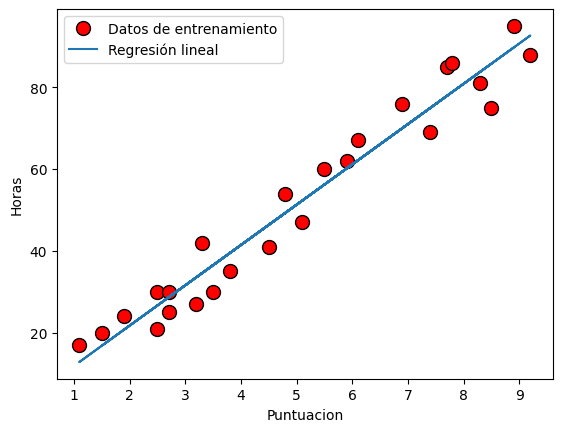

In [ ]:
# grafica la linea de ajuste
plotData(X[:, 1], y)
pyplot.plot(X[:, 1], np.dot(X, theta), '-')
pyplot.legend(['Datos de entrenamiento', 'Regresión lineal']);

In [ ]:
# Predecir valores de beneficio para poblaciones de 35,000 y 70,000
predict1 = np.dot([1, 2.5], theta)
print('Para las Horas = 2,5, se predice un beneficio de {:.2f}\n'.format(predict1))

predict2 = np.dot([1, 2.7], theta)
print('Para las Horas = 2,7, se predice un beneficio de {:.2f}\n'.format(predict2))

Para las Horas = 2,5, se predice un beneficio de 26.63

Para las Horas = 2,7, se predice un beneficio de 28.60



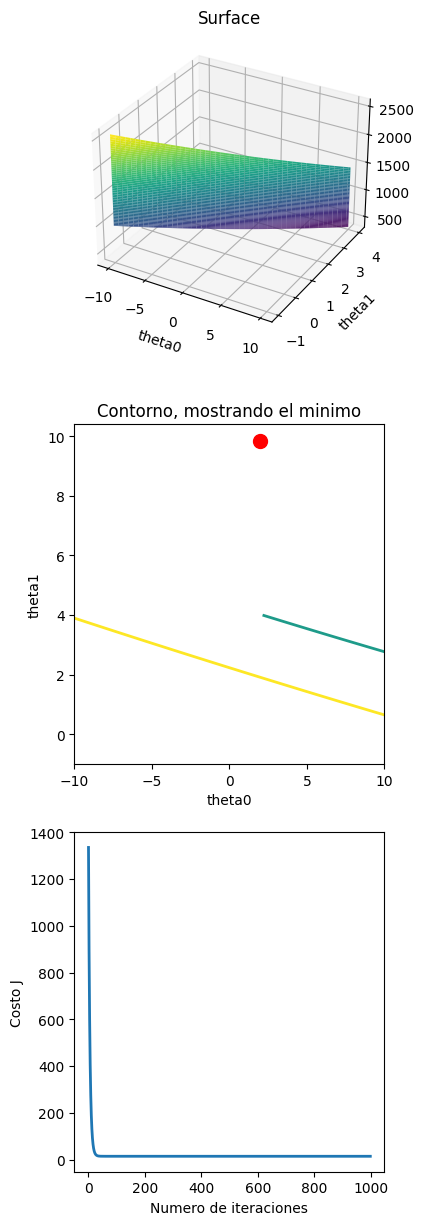

In [ ]:
# cuadrícula sobre la que se calcula J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# inicializa J_vals con una matriz de 0's
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

# Completar J_vals
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = computeCost(X, y, [theta0, theta1])

# Debido a la forma en que funcionan las cuadrículas en el comando surf,
# se necesita transponer J_vals antes de llamar a surf, o de lo contrario los ejes se invertirán
J_vals = J_vals.T

# graficar la superficie
fig = pyplot.figure(figsize=(4, 15))
ax = fig.add_subplot(311, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.title('Surface')

# graficar contornos
# Grafica J_vals como 15 contours spaciados logaritmicamente entre 0.01 y 100
ax = pyplot.subplot(312)
pyplot.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.plot(theta[0], theta[1], 'ro', ms=10, lw=2)
pyplot.title('Contorno, mostrando el minimo')


# Grafica la convergencia del costo
ax = pyplot.subplot(313)
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

pass